# Preprocess dataset for location of interest for analysis
In this notebook I show what the preprocessing function (report_functions.preprocessing) does using a location as an example

In [17]:
import numpy as np
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
data_dir = "./data"

In [19]:
region_code = "DC" #change it for the region code of your region of interest


Load the dataset asa build in Build_WaterQualityDataset

In [20]:
df = pd.read_csv(data_dir+'/'+region_code+'WaterQuality.csv', );

### 1) The dataset contains lots of determinants that are not frequently observed, and therefore they are not good to study how pollution has evolved in time, we keep only frequent results, i.e. quantities that have been studied frequently in time. If a determinant is recorded less than 25% of the time, it is excluded
These datasets can be big and the operation might take a few minutes. 

In [9]:
df_sub

,Unnamed: 0,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing
133051,133051,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2000-01-19T09:18:00,Orthophospht,"Orthophosphate, reactive as P",180,NaN,0.019,NaN,mg/l,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
133052,133052,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2000-01-19T09:18:00,Temp Water,Temperature of Water,76,NaN,6.810,NaN,cel,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
133053,133053,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2000-01-19T09:18:00,Ammonia(N),Ammoniacal Nitrogen as N,111,NaN,0.031,NaN,mg/l,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
133054,133054,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2000-01-19T09:18:00,pH,pH,61,NaN,7.950,NaN,phunits,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
133055,133055,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2000-01-19T09:18:00,Cond @ 20C,Conductivity at 20 C,62,NaN,47000.000,NaN,us/cm,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275328,4275328,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2025-05-01T14:17:00,Oxygen Diss,"Oxygen, Dissolved as O2",9924,NaN,9.190,NaN,mg/l,SEA WATER,False,PLANNED INVESTIGATION (NATIONAL AGENCY POLICY),474130,85280
4275329,4275329,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2025-05-01T14:17:00,N Oxid Filt,"Nitrogen, Total Oxidised, Filtered as N",9943,<,0.007,NaN,mg/l,SEA WATER,False,PLANNED INVESTIGATION (NATIONAL AGENCY POLICY),474130,85280
4275330,4275330,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2025-05-01T14:17:00,CHLOROPHYLL,Chlorophyll : Acetone Extract,7887,NaN,1.300,NaN,ug/l,SEA WATER,False,PLANNED INVESTIGATION (NATIONAL AGENCY POLICY),474130,85280
4275331,4275331,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2025-05-01T14:17:00,Nitrite Filt,"Nitrite, Filtered as N",6485,NaN,0.002,NaN,mg/l,SEA WATER,False,PLANNED INVESTIGATION (NATIONAL AGENCY POLICY),474130,85280


In [21]:
determinants = set(df['determinand.definition'])

sampling_time = set(df['sample.sampleDateTime'])


frequent_determinant = []

for det in determinants:
    if len(df[df['determinand.definition']== det]["result"])>len(sampling_time)/4:
        frequent_determinant.append(det)

In [22]:
set(frequent_determinant)

{'Ammonia un-ionised as N',
 'Ammoniacal Nitrogen as N',
 'BOD : 5 Day ATU',
 'Nitrate as N',
 'Nitrite as N',
 'Nitrogen, Total Oxidised as N',
 'Orthophosphate, reactive as P',
 'Oxygen, Dissolved as O2',
 'Oxygen, Dissolved, % Saturation',
 'Solids, Suspended at 105 C',
 'Temperature of Water',
 'Weather : Precipitation',
 'pH'}

In [23]:
df_sub = df[df['determinand.definition'].isin(frequent_determinant)]

In [36]:
df_sub.columns

Index(['Unnamed: 0', '@id', 'sample.samplingPoint',
       'sample.samplingPoint.notation', 'sample.samplingPoint.label',
       'sample.sampleDateTime', 'determinand.label', 'determinand.definition',
       'determinand.notation', 'resultQualifier.notation', 'result',
       'codedResultInterpretation.interpretation', 'determinand.unit.label',
       'sample.sampledMaterialType.label', 'sample.isComplianceSample',
       'sample.purpose.label', 'sample.samplingPoint.easting',
       'sample.samplingPoint.northing'],
      dtype='object')

### 2) Reshape dataset
We have each of the time and locations combination repeated as many time as different quantities are observed. It's easier to work on a dataset with each of the quantities observed as columns, therefore we pivot the dataset

In [37]:
piv = df_sub.pivot(index=['sample.sampleDateTime', "sample.samplingPoint.easting","sample.samplingPoint.northing",  
                          "sample.sampledMaterialType.label", '@id'],\
                   columns=['determinand.definition'], values='result')

In [38]:
piv = piv.reset_index()

We can check that with the pivot, we do not affect data

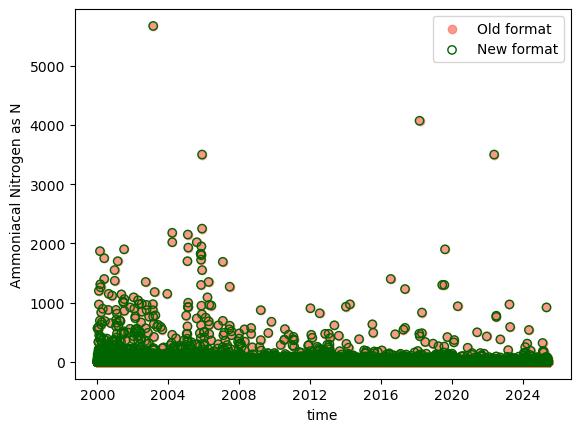

In [39]:
plt.scatter(pd.to_datetime(df_sub[df_sub['determinand.definition']== 'Ammoniacal Nitrogen as N']['sample.sampleDateTime'])\
         , df_sub[df_sub['determinand.definition']== 'Ammoniacal Nitrogen as N']["result"], label = "Old format", color="salmon",
           alpha=0.8) # old dataset format
plt.scatter(pd.to_datetime(piv['sample.sampleDateTime'])\
         , piv['Ammoniacal Nitrogen as N'], edgecolor='darkgreen', facecolor="None", label="New format") # new dataset format
plt.legend()
plt.xlabel("time")
plt.ylabel("Ammoniacal Nitrogen as N")
plt.show()

### 3) preprocessing function


In [41]:
from WaterQuality_project import report_functions as rf

In [43]:
pv2 = rf.preprocessing(df)

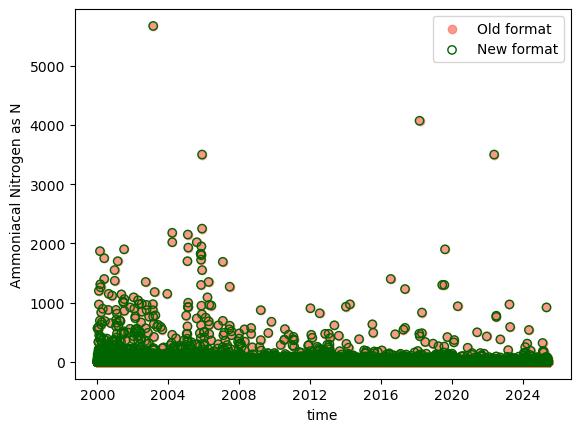

In [44]:
plt.scatter(pd.to_datetime(df_sub[df_sub['determinand.definition']== 'Ammoniacal Nitrogen as N']['sample.sampleDateTime'])\
         , df_sub[df_sub['determinand.definition']== 'Ammoniacal Nitrogen as N']["result"], label = "Old format", color="salmon",
           alpha=0.8) # old dataset format
plt.scatter(pd.to_datetime(pv2['sample.sampleDateTime'])\
         , pv2['Ammoniacal Nitrogen as N'], edgecolor='darkgreen', facecolor="None", label="New format") # new dataset format
plt.legend()
plt.xlabel("time")
plt.ylabel("Ammoniacal Nitrogen as N")
plt.show()

In [45]:
piv.to_csv(data_dir+'/'+region_code+'WaterQuality.csv')
